## Simulation of financial and duration budget for the collaboration contributions to the hl-lhc project 

In [20]:
#TASK LISTS - 07/09/29

# how are we going to represent the dates and the times on the plot, could do numbers or a gantt chart ? 


# 1 montecarlo - find the duration, do simulation, add to start date, find new end date -- DONE
# 2 find the new end date of them all -- DONE 
# 3 do 1000 times to find predicted end date -- DONE
# 4 add in the options for distribution of each task, or the distribution function of each task (what distribution?)
# 5 find the variance of the end date -- DONE
# 6 do it individually for each task to find the source of the longest delay (only valid with more information)
# 7 then work out how to add in criticality  (only valid with more information)

# 11/09/2020
#assign id and make function/objects for adding distribution DONE



In [1]:
#import packages 

import pandas as pd 
import numpy 
import scipy 
from scipy import stats
from mpmath import iv 
import os 
import matplotlib.pyplot as plt 
from random import random
import random
from datetime import datetime, timedelta, date
import calendar


In [2]:
#data cleaning functions 

def import_data(csvfile): # importing the csv
    dataframe=pd.read_csv(csvfile)
    return dataframe


def time_nan(dataframe): #converts panda dataframe into more useful format for datetime manipulation
    T = len(dataframe['START'])
    i = 0 
    while i < T: 
    
        if pd.isna(dataframe['START'][i]):
            dataframe['START'][i] = date.today()
        else:
            dataframe['START'][i]==dataframe['START'][i]
        i+=1 
    return dataframe 

def data_time(dataframe):       # converts dates to datetime objects and finds length of tasks in days
    dataframe['START']=pd.to_datetime(dataframe['START'])
    dataframe['END']=pd.to_datetime(dataframe['END'])

    dataframe['timediff predicted'] = dataframe['END']-dataframe['START']
    dataframe['timediff predicted'] = pd.to_numeric(dataframe['timediff predicted'].dt.days) 
    return dataframe



In [3]:
# add distributions to the random generators 

def set_time_distribution(dataframe, index, distribution_name):
    dataframe.at[index, 'time_distribution'] = distribution_name
    return dataframe 
def set_finance_distribution(index, distribution_name):
    dataframe.at[index, 'finance_distribution'] = distribution_name
    return dataframe 

def finance_budget_generator(dataframe, index):
    if dataframe.at[index, 'finance_distribution'] == 'normal':
        ran[index] = numpy.random.normal()
    else :
        ran[index] = numpy.random.uniform()

def time_budget_generator(dataframe, N): # needs editing. function for recognising the distribution 
    ran = numpy.zeros(N, dtype=float)
    timedifference = numpy.zeros(N, dtype=float)
    for p in range(0,N):
    
    
        if dataframe.at[p, 'time_distribution'] == 'normal':
            ran[p] = numpy.random.normal()
        else:
            ran[p] = numpy.random.uniform(low=0.0, high=1.0, size=None)
    timedifference[(p)]=tdarray[(p)]-0.1*tdarray[(p)]+tdarray[(p)]*0.2*ran[p]
    return timedifference 

    




In [4]:
# we need to change the random number distribution for each value of indices for 30 loops 
def monte_carlo_longest(dataframe):   # work out how to return the plot and show the plot 
    timediff=dataframe['timediff predicted'] 
    timediff=timediff.astype(float)

    tdarray = timediff.to_numpy()
    tdarray = numpy.char.replace(tdarray.astype(numpy.unicode_), ',','').astype(numpy.float)

    T = 10000
    timesim=numpy.zeros(T, dtype=float)
    i = 0
    while i < T:
        N=
        ran = numpy.zeros(N, dtype=float)
        timedifference = numpy.zeros(N, dtype=float)
    
        for p in range(N):
            ran[p] = numpy.random.uniform(low=0.0, high=1.0, size=None)
            timedifference[p]=tdarray[p]-0.1*tdarray[p]+tdarray[p]*0.2*ran[p]
              
        timesim[i]=numpy.max(timedifference)    
        i += 1

    
    timesimint=timesim.astype(int)
    plt.hist(timesimint, bins=40)
    plt.title("Expected length of longest collaboration", weight="bold") 
    plt.xlabel("Days") 
    plt.ylabel("Number of instances")
    plt.margins(0.1)
    plt.xlim([(timesimint.min()), (timesimint.max())])
    plt.show()

SyntaxError: invalid syntax (<ipython-input-4-e779b382f014>, line 13)

In [6]:
#this simulation uses the startdate and finds number of days predicted based on a uniform distribution of random numbers
#this function finds the maximum project length assuming the same start date 
def monte_carlo_completion(dataframe, simulations):
    timediff=dataframe['timediff predicted']
    timediff=timediff.astype(float)
    tdarray = timediff.to_numpy()
    tdarray = numpy.char.replace(tdarray.astype(numpy.unicode_), ',','').astype(numpy.float)


    T = simulations #number of simulations
    timesimint=numpy.zeros(T, dtype='O')
    todaysdate = datetime.now()
    todaysdate=todaysdate.date()
    statdiff=numpy.zeros(T,dtype='O') #for working out variance stddev
    i = 0
    while i < T:
        N=30
        ran = numpy.zeros(30, dtype=float)
        timedifference = numpy.zeros(N, dtype=float)
        datedifference = numpy.zeros(N, dtype=float)
        timedates=numpy.zeros(N,dtype='timedelta64[ns]')

        for p in range(0,30):

            ran[p] = numpy.random.uniform(low=0.0, high=1.0, size=None)

            timedifference[p]=tdarray[p]-0.1*tdarray[p]+tdarray[p]*0.2*ran[p]

            datedifference[p]=timedifference[p]
            round(datedifference[p],0)
            timedates[p]=timedelta(days=datedifference[p])


        dataframe['NEW END']=dataframe['START']+timedates 
        dataframe['NEW END']=dataframe['NEW END'].dt.date
        timesimint[i]=max(dataframe['NEW END'])

        statdiff[i]=timesimint[i]-todaysdate #for working out the variance 
        i += 1

    i=0
    while i<T:
        statdiff[i]=statdiff[i].days
        i+=1


    #standard deviation and variance of the simulation for the duration of the project in no. of days 
    variance_time = numpy.var(statdiff)
    std_time = numpy.std(statdiff)
    mean_time=numpy.mean(statdiff)
    mean_time=timedelta(days=mean_time)+todaysdate #average day of completion 
    return timesimint, std_time, variance_time

def plot_completion_date(data, std, var):
    plt.hist(data, bins=40)
    plt.title("Expected Completion Date", weight="bold") 
    plt.xlabel("Date of completion") 
    plt.ylabel("Number of instances")
    plt.margins(0.1)
    plt.xlim([(data.min()), (data.max())])
    plt.xticks(rotation='vertical') 
    plt.show()
    std_timefloat = "{:.0f}".format(std); print('Standard deviation: ' + std_timefloat + ' Days')
    var_timefloat = "{:.0f}".format(var); print('Variance: ' + var_timefloat + ' Days')

In [7]:
# Finance simulation using a uniform random number generator (see function budget_maker)


def new_budget(budget_estimate):
    u = numpy.random.uniform()
    if u < 0.05: return budget_estimate*0.9
    if 0.05 < u < 0.85: return budget_estimate
    return budget_estimate*1.1 

def monte_carlo_finance(dataframe, simulations):
    moneyarray=dataframe["CHFK"]
    moneyarray = moneyarray.to_numpy()
    moneyarray = numpy.char.replace(moneyarray.astype(numpy.unicode_), ',','').astype(numpy.float)
    M = simulations
    sim=numpy.zeros(M, dtype=float)
    i = 0
    while i < M:
        N=30
        ran = numpy.zeros(N, dtype=float)
        budget = numpy.zeros(N, dtype=float)
        for p in range(N):

            budget[p]=new_budget(moneyarray[p]) # need to change function in a function 


            total = sum(budget)
            total 
        sim[i]=total    
        i += 1
    simint = sim.astype(int)
    return simint 

def plot_finance_small_bins(data):
    plt.stem(numpy.bincount(data), linefmt='-.', use_line_collection=True) 
    plt.title("Expected budget", weight="bold") 
    plt.xlabel("1000 CHF") 
    plt.ylabel("Number of instances")
    plt.margins(0.1)
    plt.xlim([(data.min()), (data.max())])
    plt.xticks(rotation='vertical') 
    plt.show()
    print("Worst case: {} K CHF".format(data.min()))
    print("Best case: {} K CHF".format(data.max()))
    print("Median: {} K CHF".format(numpy.median(data)))

def plot_finance_large_bins(data):    
    plt.hist(data, bins=20)
    plt.title("Expected budget", weight="bold") 
    plt.xlabel("1000 CHF") 
    plt.ylabel("Number of instances")
    plt.margins(0.1)
    plt.xticks(rotation='vertical') 
    plt.xlim([(data.min()), (data.max())])
    plt.show()

In [17]:
def main_finance(simulations): #argument is how many random samples 
    df = import_data("collab-csv-convert-.csv")[0:30] 
    print(df['START'])
    df = time_nan(df)
    print(df['START'])
    df = data_time(df)
    print(df['START'])

    df = set_time_distribution(df,0, 'normal')
    data = monte_carlo_finance(df, simulations)
    plot_finance_small_bins(data)
    plot_finance_large_bins(data)
    
def main_end_date(simulations):
    df = import_data("collab-csv-convert-.csv")[0:30] 
    df = time_nan(df)
    df = data_time(df)

    data, std, var, = monte_carlo_completion(df, simulations)
    plot_completion_date(data,std,var)
    

0      1/1/2016
1      4/1/2016
2      1/1/2017
3           NaN
4      3/1/2020
5      4/1/2019
6      1/1/2018
7      1/1/2016
8           NaN
9      7/1/2019
10          NaN
11          NaN
12          NaN
13    12/1/2020
14     4/1/2020
15          NaN
16          NaN
17    9/15/2020
18          NaN
19          NaN
20          NaN
21          NaN
22          NaN
23    11/1/2019
24          NaN
25          NaN
26          NaN
27          NaN
28          NaN
29          NaN
Name: START, dtype: object
0       1/1/2016
1       4/1/2016
2       1/1/2017
3     2020-09-24
4       3/1/2020
5       4/1/2019
6       1/1/2018
7       1/1/2016
8     2020-09-24
9       7/1/2019
10    2020-09-24
11    2020-09-24
12    2020-09-24
13     12/1/2020
14      4/1/2020
15    2020-09-24
16    2020-09-24
17     9/15/2020
18    2020-09-24
19    2020-09-24
20    2020-09-24
21    2020-09-24
22    2020-09-24
23     11/1/2019
24    2020-09-24
25    2020-09-24
26    2020-09-24
27    2020-09-24
28    2020-09-24


/usr/local/bin/start_ipykernel.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


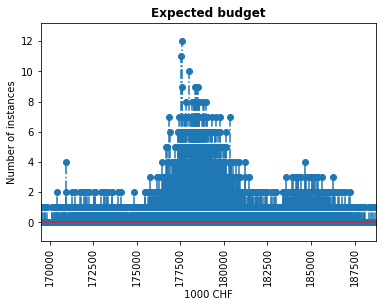

Worst case: 169505 K CHF
Best case: 188715 K CHF
Median: 178847.0 K CHF


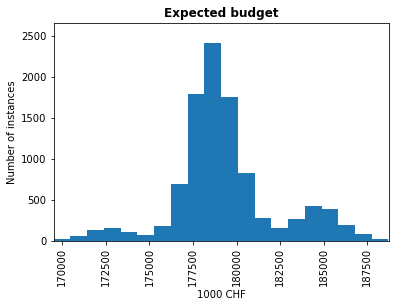

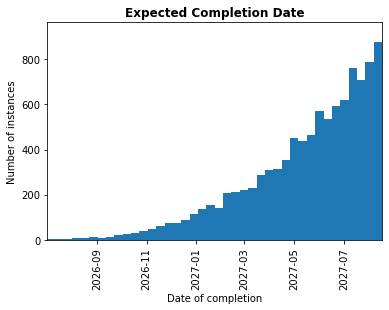

Standard deviation: 74 Days
Variance: 5493 Days


In [18]:
main_finance(10000)
main_end_date(10000)
